#Assignment 4: Machine Learning
##Group Assignment - Question 2

Anna Kurek - 01444623

Linyun Huang - 01379982

Mark O'Shea - 01384962

Mingyang Tham - 01428168

Rejpal Matharu - 01367169

Yiting Wang - 01423116


**1. Explore manually the website http://sofifa.com. Under the tab All, press on the any of the Welsh flags (e.g. those corresponding to G. Bale or A. Ramsey). Notice how the URL of the opened webpage changes to http://sofifa.com/players?na=50. Scrolling down, notice that not all players fit in one page. If you press Next, the new URL is http://sofifa.com/players?na=52&offset=80. Can you see the pattern? Next, select an individual player and notice how the URL changes. We want to download the
numerical attributes available for the first 640 Argentinian players (as appeared in the website).** 



By exploring the link www.sofifa.com, we realised the url changes to to reference the player selected. In addition, we noticed only a maximimum of 80 players of a country fit on one page. By clicking next we noticed how the offset refelects this fact by incrementing in units of 80. Using this insight we ran the provided code footballscrape.py to get the data for Argentinian players. This file was downloaded and saved as 'ArgentinaPlayers.csv', see attachments.

**2. Explain in detail the code below. In order to better understand the code, you may
want to look at the following websites: www.crummy.com/software/BeautifulSoup, www.aivosto.com/vbtips/regex.html, docs.python.org/2/library/re**

Attributes defines the list of player attributes, we define this in the set called attributes and label each column according to each specific skill.

The code then creates an empty set called links. This is where all the links of the players will be stored. The code then runs a for loop, using the offset function to generate the url of each player, where the initial page (for the team) is set by manually by us in requests.get(). The offset function is set to in 80 intervals representing the 80 players on each page and only needs to be defined until the up to the last page. Beuaitfulsoup a htm is then used to capture the the player specific link, by using a sub loop that finds the hyperlink and appends this to the list called links.

The code then adds the prefix 'http://sofifa.com' to the begining of each player extension link to ge the full url. Later the code will the links to capture the attributes of each player on their respective page.

To prepare for capture later, the pattern expression defines any string character problems we may encounter with player names etc. The attr loop again, checks for the same defines any string character problems we may encounter with each attribute. 


In the next section, the code attempts to open each of the player links and and loop through each of the attrributes and capture the information. It starts by defining an empty set called rows. Then loops through the links set and opens each url. It captures the text information sing the Beautifulsoup function. It then defines a a few variables in our collection set rows, including player name, link etc. The sub loop then iterates through and captures each of the 34 attributes appending each one to a new column. The code then repeats the steps above for each player link to produce a row dataframe, with 36 columns (name, link + attributes) and length of row as long as the number of players collected.

Note: the original code didn't work exactly as neccessary and we nedded to change text.decode(utf-8). In addition the code removes the top 10 players this is to remove the top outliers and make the clustering model more interesting.

**3. How would you change the code to download the first 480 English players instead.**

In order to capture the 480 english players, we need to change the code in the following ways. Firstly given that they are only 480 english players we need to change the offset to 400. Secondly, many of the english players have '-',''' etc. in their name. We then modify the section in pattern to take these into account. Lastly, we change the name of the csv of the output to EnglandPlayers.csv. An example of the changed code is below, we have slightly modified it for the sake of this ipython notebook, in that we don't create the final step a csv (so we can continue using the df in the next cell) and don't print the players at each step, however see attached "england_footballscrape.py" which is the full version run into csv.

In [11]:
#Changed code for English Players

import pandas as pd

from bs4 import BeautifulSoup

import requests

import re

import unicodedata

attributes=['Crossing','Finishing','Heading accuracy',

 'Short passing','Volleys','Dribbling','Curve',

 'Free kick accuracy','Long passing','Ball control','Acceleration',

 'Sprint speed','Agility','Reactions','Balance',

 'Shot power','Jumping','Stamina','Strength',

 'Long shots','Aggression','Interceptions','Positioning',

 'Vision','Penalties','Composure','Marking',

 'Standing tackle','Sliding tackle','GK diving',

 'GK handling','GK kicking','GK positioning','GK reflexes']

links=[]   #get all england players

for offset in ['0','80','160','240','320','400']:

    page=requests.get('http://sofifa.com/players?na=14&offset='+offset) 

    soup=BeautifulSoup(page.content,'html.parser')

    for link in soup.find_all('a'):

        links.append(link.get('href'))

links=['http://sofifa.com'+l for l in links if 'player/'in l]  

####pattern regular expression 

pattern=r"""\s*([\w\s\-\'\.]*?)\s*FIFA"""   #file starts with empty spaces... players name...FIFA...other stuff     

for attr in attributes:

    pattern+=r""".*?(\d*\s*"""+attr+r""")"""  #for each attribute we have other stuff..number..attribute..other stuff

pat=re.compile(pattern, re.DOTALL)    #parsing multiline text

rows=[]

links=links[10:]

for j,link in enumerate(links):

    #print (j,link)

    row=[link]

    playerpage=requests.get(link)

    playersoup=BeautifulSoup(playerpage.content,'html.parser')

    text=playersoup.get_text()

    text=unicodedata.normalize('NFKD', text).encode('ascii','ignore')

    a=pat.match(text.decode('utf-8'))

    row.append(a.group(1))

    for i in range(2,len(attributes)+2):

        row.append(int(a.group(i).split()[0]))

    rows.append(row)

    #print (row[1])

df=pd.DataFrame(rows,columns=['link','name']+attributes)

print("Done")

#df.to_csv('EnglandPlayers.csv',index=False)

Done



**4. Use the sklearn.cluster.KMeans Python class to cluster the players into 4 clusters.**

In [12]:
#change your directory if necessary, if you are loading a csv
#import os
#os.getcwd()
#os.chdir('/')

#Preview dataframe of England players
df.head()

,link,name,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Dribbling,Curve,Free kick accuracy,...,Penalties,Composure,Marking,Standing tackle,Sliding tackle,GK diving,GK handling,GK kicking,GK positioning,GK reflexes
0,http://sofifa.com/player/203042,Jack Butland,11,16,12,36,12,21,12,14,...,42,59,16,13,11,81,83,72,78,85
1,http://sofifa.com/player/54050,Wayne Rooney,77,81,75,81,84,73,84,81,...,84,88,48,51,37,10,11,13,8,7
2,http://sofifa.com/player/163631,Leighton Baines,86,63,74,79,63,78,81,81,...,90,81,78,81,78,8,15,10,13,12
3,http://sofifa.com/player/169595,Danny Rose,81,57,62,76,64,79,64,57,...,57,75,82,84,85,10,11,8,13,13
4,http://sofifa.com/player/194957,Phil Jones,64,50,78,75,60,60,38,35,...,55,72,79,81,82,10,8,6,16,11


In [13]:
# loading libraries
import pandas as pd
import numpy as np
import scipy as scipy
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#import dataset
#can read csv, we have used the df directly from above for the sake of this ipython notebook
#df = pd.read_table('EnglandPlayers.csv', sep=',')
df1 = df.iloc[:,2:]

#apply clusters, set to 4
kmeans = KMeans(n_clusters=4,random_state=123)

#kmeans clustering model
model = kmeans.fit(df1)

#group data
players = df.iloc[:,:]
labels = kmeans.predict(df1)
se = pd.Series(labels)
players['Groups']=se.values

Above, we ran the read the csv datafile of English Players. We then fitted 4 clusters to the data set using the kmeans function fit and get the labels assigned by the model.

**5. By inspecting the clusters and looking up individual players online, try to assign mean-
ingful labels to the clusters.**

Using the labels and original data, we can then split our data into 4 clusters based on the assigned grouping by the model. These are defined below.

In [23]:
#We store the clusters
clus0 = players.loc[players.Groups == 0]
clus1 = players.loc[players.Groups == 1]
clus2 = players.loc[players.Groups == 2]
clus3 = players.loc[players.Groups == 3]

#Preview cluster 0
clus0.head()


,link,name,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Dribbling,Curve,Free kick accuracy,...,Composure,Marking,Standing tackle,Sliding tackle,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Groups
0,http://sofifa.com/player/203042,Jack Butland,11,16,12,36,12,21,12,14,...,59,16,13,11,81,83,72,78,85,1
8,http://sofifa.com/player/163264,Tom Heaton,17,12,16,32,12,17,15,13,...,56,15,15,13,80,79,76,80,83,1
9,http://sofifa.com/player/150724,Joe Hart,14,14,10,32,19,23,17,13,...,60,14,14,13,80,77,73,80,83,1
22,http://sofifa.com/player/163155,Ben Foster,15,18,14,36,14,14,15,17,...,67,15,15,14,78,79,73,77,82,1
35,http://sofifa.com/player/204935,Jordan Pickford,17,19,15,50,20,14,18,16,...,51,14,20,12,77,77,86,74,82,1


In [24]:
#Preview cluster 1
clus1.head()

,link,name,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Dribbling,Curve,Free kick accuracy,...,Composure,Marking,Standing tackle,Sliding tackle,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Groups
0,http://sofifa.com/player/203042,Jack Butland,11,16,12,36,12,21,12,14,...,59,16,13,11,81,83,72,78,85,1
8,http://sofifa.com/player/163264,Tom Heaton,17,12,16,32,12,17,15,13,...,56,15,15,13,80,79,76,80,83,1
9,http://sofifa.com/player/150724,Joe Hart,14,14,10,32,19,23,17,13,...,60,14,14,13,80,77,73,80,83,1
22,http://sofifa.com/player/163155,Ben Foster,15,18,14,36,14,14,15,17,...,67,15,15,14,78,79,73,77,82,1
35,http://sofifa.com/player/204935,Jordan Pickford,17,19,15,50,20,14,18,16,...,51,14,20,12,77,77,86,74,82,1


In [25]:
#Preview cluster 2
clus2.head()

,link,name,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Dribbling,Curve,Free kick accuracy,...,Composure,Marking,Standing tackle,Sliding tackle,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Groups
12,http://sofifa.com/player/231677,Marcus Rashford,77,79,72,2,72,84,74,78,...,74,29,37,33,11,6,15,7,14,2
13,http://sofifa.com/player/186146,Danny Welbeck,69,75,75,76,76,80,61,62,...,76,28,38,33,9,10,6,12,16,2
15,http://sofifa.com/player/50542,Jermain Defoe,54,87,66,68,82,78,63,68,...,84,24,20,11,7,14,8,10,13,2
20,http://sofifa.com/player/164859,Theo Walcott,74,76,58,74,71,81,76,74,...,76,33,39,36,11,8,9,9,8,2
31,http://sofifa.com/player/183125,Troy Deeney,55,80,82,73,78,65,68,36,...,78,33,29,25,10,11,16,12,15,2


In [26]:
#Preview cluster 3
clus3.head()

,link,name,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Dribbling,Curve,Free kick accuracy,...,Composure,Marking,Standing tackle,Sliding tackle,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Groups
1,http://sofifa.com/player/54050,Wayne Rooney,77,81,75,81,84,73,84,81,...,88,48,51,37,10,11,13,8,7,3
2,http://sofifa.com/player/163631,Leighton Baines,86,63,74,79,63,78,81,81,...,81,78,81,78,8,15,10,13,12,3
3,http://sofifa.com/player/169595,Danny Rose,81,57,62,76,64,79,64,57,...,75,82,84,85,10,11,8,13,13,3
4,http://sofifa.com/player/194957,Phil Jones,64,50,78,75,60,60,38,35,...,72,79,81,82,10,8,6,16,11,3
5,http://sofifa.com/player/183711,Jordan Henderson,81,67,65,85,72,74,80,74,...,78,73,2,76,7,13,7,9,13,3


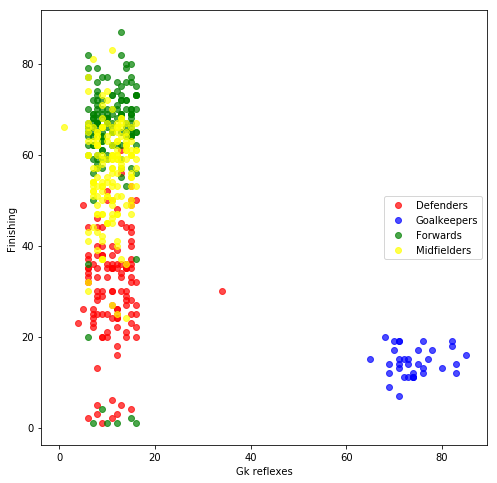

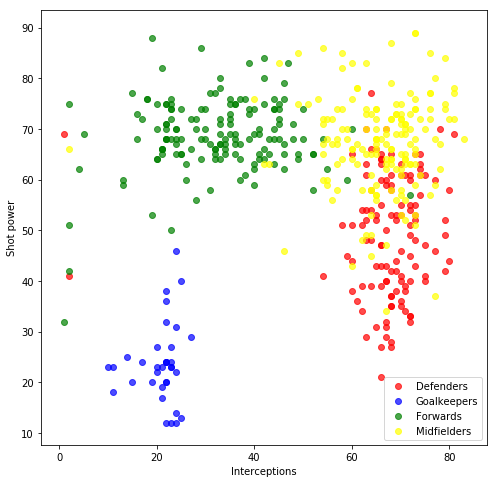

In [27]:
k_list = [clus0.values, clus1.values,clus2.values]

#plot based on an attribute
plt.clf()
plt.figure(figsize=(8,8))
grp0 = plt.scatter(df[df['Groups']==0]['GK reflexes'], df[df['Groups']==0]['Finishing'], color = 'red', alpha = 0.7)
grp1 = plt.scatter(df[df['Groups']==1]['GK reflexes'], df[df['Groups']==1]['Finishing'], color = 'blue', alpha = 0.7)
grp2 = plt.scatter(df[df['Groups']==2]['GK reflexes'], df[df['Groups']==2]['Finishing'], color = 'green', alpha = 0.7)
grp3 = plt.scatter(df[df['Groups']==3]['GK reflexes'], df[df['Groups']==3]['Finishing'], color = 'yellow', alpha = 0.7)  

plt.legend((grp0, grp1, grp2, grp3), ('Defenders', 'Goalkeepers', 'Forwards','Midfielders'), loc='right')
plt.xlabel('Gk reflexes')
plt.ylabel('Finishing')
plt.show()

#ploy 2

plt.clf()
plt.figure(figsize=(8,8))
grp0 = plt.scatter(df[df['Groups']==0]['Interceptions'], df[df['Groups']==0]['Shot power'], color = 'red', alpha = 0.7)
grp1 = plt.scatter(df[df['Groups']==1]['Interceptions'], df[df['Groups']==1]['Shot power'], color = 'blue', alpha = 0.7)
grp2 = plt.scatter(df[df['Groups']==2]['Interceptions'], df[df['Groups']==2]['Shot power'], color = 'green', alpha = 0.7)
grp3 = plt.scatter(df[df['Groups']==3]['Interceptions'], df[df['Groups']==3]['Shot power'], color = 'yellow', alpha = 0.7)  

plt.legend((grp0, grp1, grp2, grp3), ('Defenders', 'Goalkeepers', 'Forwards','Midfielders'), loc='lower right')
plt.xlabel('Interceptions')
plt.ylabel('Shot power')
plt.show()

According to our dataset we have assigned the 4 clusters as:
clus0 = Defenders
clus1 = Goalkeepers
clus2 = Midfielders
clus3 = Forwards

We assigned these clusters based on two methodologies. Firstly, using the clusters assigned we can search through the common links in each and have identified them to be positions of players. However more scientifically and our preferred methodology is to contrast the atributes in clusters and plot them to distinguish which clusters are which positions.

Our first graph, plots Gk reflexes against finishing. We can clearly see that cluster 1 is goalkeepers as they have excelling scores in Gk reflexes. On the other y axis, we can clearly see three groups in order of finishing, the top group - cluster 2 is forwards, followed by midfielders - cluster 3 and then defenders - cluster 0 as expected. 

To further confirm, we ran another plot shot power and interception to greater distinguish the differences between forwards, midfielders and defenders seen in the previous plot. This second plot clearly demonstrates 4 unique clustering groups. Cluster 2, are strong at shot power and weak at interception - we assign them Forwards, cluster 0 are middle at shot power and high on interception - we assign them Defenders, cluster 3 are strong at both shot power and interception - we assign them Midfielders and cluster 1 are weak at interception and shot power - we assign them Goalkeepers.

**6. For a new and unknown player, the following attributes are available: Crossing 45, Sprint Speed 40, Long Shots 35, Aggression 45, Marking 60, Finishing 40, and GK_Handling 15.
For each of your 4 clusters from Step 4, compute the cluster centroid. Assign the new player to the nearest cluster based on the distance to the cluster centroids, using only the available attributes.
**

In [28]:
#Calculate the euclidean distance using the centroids calculated
# Crossing = 0, Sprint Speed = 11, Long Shots = 19, etc...
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns=list(df1)

centroids_selected = centroids.loc[:,['Crossing','Sprint speed','Long shots','Aggression','Marking','Finishing','GK handling']]

new_sample = pd.DataFrame(columns=centroids_selected.columns)

new_sample.loc[0]=[45,40,35,45,60,40,15]

min_dist_ind=-1
min_dist=0
for i in range(len(centroids_selected)):
    dist = scipy.spatial.distance.cdist(centroids_selected.iloc[[i],:], new_sample, metric='euclidean')
    print(dist[0,0])
    if min_dist==0 or dist[0,0]<= min_dist:
        min_dist=dist[0,0]
        min_dist_ind=i

print("The assigned cluster for this player is "+str(min_dist_ind)+", which is a Defender.")


35.8621831411
85.9789105608
62.7291778119
54.071262288
The assigned cluster for this player is 0, which is a Defender.


Firstly we outputted the centroids from our model We then created a unique dataframe isolating all the centroids needed to predict the new player.

Then using a new sample that is not classified and based on the 8 characteristics Crossing to GK handling, we use a function from SciPy to calculate the euclidean distance between this sample and the centroids of the 4 clusters we calculated based on the these 8 set of measures. The loop in our code does this and returns the cluster where the euclidean distance is the smallest. 

As seen from our output the euclidean distance which is the smallest is 35.86, this refers to cluster 0 or Defenders. Observing the attributes of the sample we are to classify, we can see that our classificaiton by our model makes sense. Marking (60) and Aggression (45) are the highest, whereas GK (15) and Long shots (35) are the lowest. Intuitively we would expect a defender to be strong in marking and agression. Given the values assigned, it also makes intuitive sense for our clustering model to group this player towards this cluster.


